<a target="_blank" href="https://colab.research.google.com/github/wakusoftware/curso-ml-espanol/blob/master/C1%20-%20Aprendizaje%20Supervisado/C1_W1_Lab02_Representacion_RL.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Lab: Representación regresión Lineal

<figure>
 <img src="./images/C1_W1_L3_S1_Lecture_b.png"   style="width:600px;height:200px;">
</figure>

## Objetivos
En este laboratorio vas a:

- Aprender a implementar el modelo $f_{w,b}$ para regresión lineal con una variable

## Notación
Here is a summary of some of the notation you will encounter.  

**General**

| $a$ | escalar, sin negritas                                                     ||
| $\mathbf{a}$ | vector, en negritas                                                      ||

**Regresión**

| $\mathbf{x}$ | Valores de características de los ejemplos de entrenamiento (en este laboratorio - Tamaño (1000 pies cuadrados)) | x_train |
| $\mathbf{y}$ | Objetivos de los ejemplos de entrenamiento (en este laboratorio Precio (miles de dólares)). | y_train
| $x^{(i)}$, $y^{(i)}$ | $i$-ésimo ejemplo de entrenamiento | x_i, y_i|
| m | Número de ejemplos de entrenamiento | m|
| $w$ | parámetro: weight (peso), | w |
| $b$ | parámetro: bias (sesgo) | b |
| $f_{w,b}(x^{(i)})$ | El resultado de la evaluación del modelo en $x^{(i)}$, parametrizado por $w,b$: $f_{w,b}(x^{(i)}) = wx^{(i)}+b$ | f_wb |


## Herramientas

En este laboratorio utilizarás:

- NumPy, una biblioteca popular para computación científica
- Matplotlib, una biblioteca popular para graficar datos

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mplstyle')

# Declaración del problema
<img align="left" src="./images/C1_W1_L3_S1_trainingdata.png"    style=" width:380px; padding: 10px;  " /> 

Como en la clase, usarás el ejemplo de la predicción del precio de viviendas. Este laboratorio utilizará un conjunto de datos simple con solo dos puntos de datos: una casa de 1000 pies cuadrados (sqft) vendida por \\$300,000 y una casa 2000 pies cuadrados vendia por \\$500,000. Estos dos puntos constituirán nuestro *training set*. En este laboratorio, las unidades de tamaño son 1000 sqft y las unidades de precio son miles de dólares.

| Tamaño (1000 sqft) | Precio (1000s of dollars) |
|--------------------|---------------------------|
| 1.0                | 300                       |
| 2.0                | 500                       |

Debemos ajustar un modelo de regresión lineal (mostrado arriba como la línea recta azul) a través de estos dos puntos, para que luego puedas predecir el precio de otras casas, por ejemplo, una casa de 1200 sqft.


Por favor, ejecuta la siguiente celda de código para crear tus variables `x_train` y `y_train`. Los datos se almacenan en arreglos unidimensionales de NumPy.

In [2]:
# x_train es la variable de entrada (tamaño en 1000 pies cuadrados)
# y_train es la variable objetivo (precio en miles de dólares)
x_train = np.array([1.0, 2.0])
y_train = np.array([300.0, 500.0])
print(f"x_train = {x_train}")
print(f"y_train = {y_train}")

x_train = [1. 2.]
y_train = [300. 500.]


>**Nota**: El curso utilizará frecuentemente el formato de salida 'f-string' de Python descrito [aquí](https://docs.python.org/3/tutorial/inputoutput.html). El contenido entre las llaves se evalúa al producir la salida.

### Número de ejemplos de entrenamiento `m`
Utilizarás `m` para denotar el número de ejemplos de entrenamiento. Los arrays de Numpy tienen un parámetro `.shape`. `x_train.shape` devuelve una tupla (tuple) de Python con una entrada para cada dimensión. `x_train.shape[0]` es la longitud del arreglo y el número de ejemplos, como se muestra a continuación.

In [3]:
# m es el número de ejemplos de entrenamiento
print(f"x_train.shape: {x_train.shape}")
m = x_train.shape[0]
print(f"El número de ejemplos de entrenamiento es: {m}")

x_train.shape: (2,)
El número de ejemplos de entrenamiento es: 2


También se puede utilizar la función len() de Python, como se muestra a continuación.

In [4]:
# m es el número de ejemplos de entrenamiento
m = len(x_train)
print(f"El número de ejemplos de entrenamiento es: {m}")

El número de ejemplos de entrenamiento es: 2


### Ejemplo de entrenamiento `x_i, y_i`

Utilizarás (x$^{(i)}$, y$^{(i)}$) para denotar el $i$-ésimo ejemplo de entrenamiento. Dado que Python está indexado en cero, (x$^{(0)}$, y$^{(0)}$) es (1.0, 300.0) y (x$^{(1)}$, y$^{(1)}$) es (2.0, 500.0).

Para acceder a un valor en un arreglo de Numpy, se indexa el arreglo con el desplazamiento deseado. Por ejemplo, la sintaxis para acceder a la posición cero de `x_train` es `x_train[0]`.
Ejecuta el siguiente bloque de código para obtener el $i$-ésimo ejemplo de entrenamiento.

In [5]:
i = 0 # Cambia esto a 1 para ver (x^1, y^1)

x_i = x_train[i]
y_i = y_train[i]
print(f"(x^({i}), y^({i})) = ({x_i}, {y_i})")


(x^(0), y^(0)) = (1.0, 300.0)


### Graficando los datos

Puedes graficar estos dos puntos usando la función `scatter()` en la biblioteca `matplotlib`, como se muestra en la celda a continuación.

- Los argumentos de la función `marker` y `c` muestran los puntos como cruces rojas (el predeterminado son puntos azules).

Puedes usar otras funciones en la biblioteca `matplotlib` para configurar el título y las etiquetas que se mostrarán.

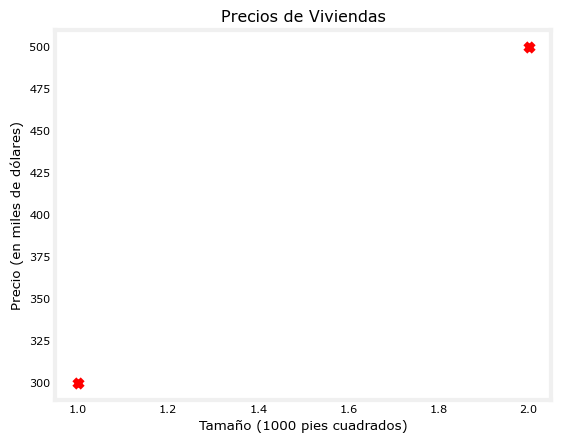

In [6]:
# Graficar los puntos de datos
plt.scatter(x_train, y_train, marker='x', c='r')
# Establecer el título
plt.title("Precios de Viviendas")
# Establecer la etiqueta del eje y
plt.ylabel('Precio (en miles de dólares)')
# Establecer la etiqueta del eje x
plt.xlabel('Tamaño (1000 pies cuadrados)')
plt.show()


## Función del modelo

<img align="left" src="./images/C1_W1_L3_S1_model.png"     style=" width:380px; padding: 10px; " > 

Como se describió en la clase, la función del modelo para la regresión lineal (que es una función que mapea de `x` a `y`) se representa como

$$ f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{1}$$

La fórmula anterior es cómo puedes representar líneas rectas: diferentes valores de $w$ y $b$ te dan diferentes líneas rectas en la gráfica. <br/> <br/> <br/> <br/> <br/>

Intentemos obtener una mejor intuición de esto a través de los siguientes bloques de código. Comencemos con $w = 100$ y $b = 100$.

**Nota: Puedes volver a esta celda para ajustar los parámetros w y b del modelo**

In [7]:
w = 100
b = 100
print(f"w: {w}")
print(f"b: {b}")

w: 100
b: 100


Ahora, calculemos el valor de $f_{w,b}(x^{(i)})$ para tus dos puntos de datos. Puedes escribir esto explícitamente para cada punto de datos como -

para $x^{(0)}$, `f_wb = w * x[0] + b`

para $x^{(1)}$, `f_wb = w * x[1] + b`

Para un gran número de puntos de datos, esto puede volverse engorroso y repetitivo. Entonces, en lugar de eso, puedes calcular la salida de la función en un bucle `for` como se muestra en la función `compute_model_output` a continuación.
> **Nota**: La descripción del argumento `(ndarray (m,))` describe un arreglo n-dimensional de Numpy de forma (m,). `(scalar)` describe un argumento sin dimensiones, solo una magnitud.  
> **Nota**: `np.zero(n)` devolverá un arreglo de Numpy unidimensional con $n$ entradas

In [9]:
def compute_model_output(x, w, b):
    """
    Calcula la predicción de un modelo lineal
    Argumentos:
      x (ndarray (m,)): Datos, m ejemplos
      w,b (scalar)    : parámetros del modelo
    Retorna
      y (ndarray (m,)): valores objetivo
    """
    m = x.shape[0]
    f_wb = np.zeros(m)
    for i in range(m):
        f_wb[i] = w * x[i] + b
        
    return f_wb


Ahora vamos a llamar a la función `compute_model_output` y graficar la salida.

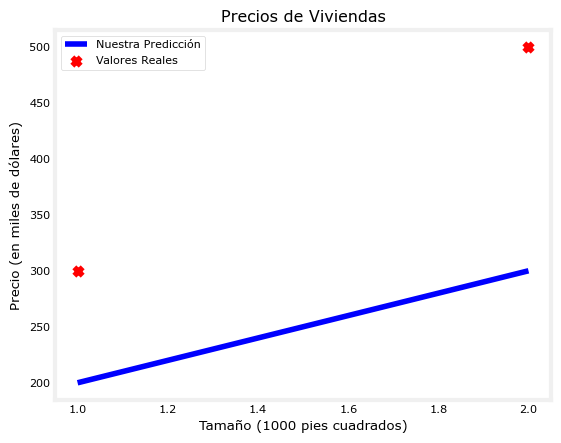

In [10]:
tmp_f_wb = compute_model_output(x_train, w, b,)

# Graficar nuestra predicción del modelo
plt.plot(x_train, tmp_f_wb, c='b',label='Nuestra Predicción')

# Graficar los puntos de datos
plt.scatter(x_train, y_train, marker='x', c='r',label='Valores Reales')

# Establecer el título
plt.title("Precios de Viviendas")
# Establecer la etiqueta del eje y
plt.ylabel('Precio (en miles de dólares)')
# Establecer la etiqueta del eje x
plt.xlabel('Tamaño (1000 pies cuadrados)')
plt.legend()
plt.show()


Como puedes ver, establecer $w = 100$ y $b = 100$ *no* resulta en una línea que se ajuste a nuestros datos.

### Desafío
Intenta experimentar con diferentes valores de $w$ y $b$. ¿Cuáles deberían ser los valores para una línea que se ajuste a nuestros datos?

#### Consejo:
Puedes usar tu mouse para hacer clic en el triángulo a la izquierda de los "Consejos" verdes abajo para revelar algunas pistas para elegir b y w.

<details>
<summary>
    <font size='4', color='green'><b>Pista</b></font>
</summary>
    <p>
    <ul>
        <li>Prueba $w = 200$ y $b = 100$ </li>
    </ul>
    </p>

### Predicción
Ahora que tenemos un modelo, podemos usarlo para hacer nuestra predicción original. Predigamos el precio de una casa de 1200 pies cuadrados. Dado que las unidades de $x$ están en miles de pies cuadrados, $x$ es 1.2.

In [11]:
w = 200                         
b = 100    
x_i = 1.2
costo_1200sqft = w * x_i + b    

print(f"${costo_1200sqft:.0f} mil dólares")

$340 mil dólares


# ¡Felicidades!
En este laboratorio has aprendido:
 - La regresión lineal construye un modelo que establece una relación entre características y objetivos.
     - En el ejemplo anterior, la característica era el tamaño de la casa y el objetivo era el precio de la casa.
     - Para la regresión lineal simple, el modelo tiene dos parámetros $w$ y $b$ cuyos valores se ajustan utilizando *datos de entrenamiento*.
     - Una vez que se han determinado los parámetros de un modelo, el modelo se puede utilizar para hacer predicciones sobre datos nuevos.